# Algorithms for Uncertainty

## Quantification

### Tutorial 2: Standard Monte Carlo sampling

In this worksheet, we focus on standard Monte Carlo sampling.

### Monte Carlo integration

In the lecture, we saw that we can use Monte Carlo sampling to approximate integrals.

To this end, consider $f$ : $[0,\ 1]\rightarrow \mathbb{R}$. The aim is to evaluate $I=\displaystyle \int_{0}^{1}f(x)dx.$

The Monte Carlo approximation of $I$ reads

\begin{align}
I\displaystyle \approx\hat{I}_{f}=\frac{1}{N}\sum_{i=1}^{N}f(U_{i}), (1)
\end{align}

where $U_{i}\sim \mathcal{U}(0,1)$ . The associated standard error is

\begin{align}
\displaystyle \hat{\sigma}_{\hat{I}_{f}}=\frac{\hat{\sigma}_{f}}{\sqrt{N}}, (2)
\end{align}


where $\displaystyle \hat{\sigma}_{f}^{2}=\frac{1}{N-1}\sum_{i=1}^{N}(f(U_{i})-\hat{I}_{f})^{2}.$

### Short introduction to chaospy1

Import chaospy in your program as

import chaospy as cp

Define the distribution of interest as
dis $\mathrm{t}\mathrm{r}=$ cp. chaospyDistribution (parameters)

where

chaospyDistribution $=$ \{Uniform, Normal, Beta, Gamma etc. \}

For example, the syntax to define an uniform distribution defined on $[a,\ b]$ is

distr $=$ cp. Uniform $(\mathrm{a},\ \mathrm{b})$

To sample from the defined distribution distr,samples $=$ dis $\mathrm{t}\mathrm{r}$. sample $($siz $\mathrm{e}=\mathrm{s}\mathrm{a}\mathrm{m}\mathrm{p}\mathrm{l}\mathrm{e}$ Size $)$ ,

where sampleSize is the desired number of samples. Therefore, if you want to write a

python script to e.g. generate 1000 uniform random variables in [0.2, 0.5], the syntax is

import chaospy as cp

distr $=$ cp. Uniform (0.2, 0.5)

samples $=$ dis $\mathrm{t}\mathrm{r}$. samples $($siz $\mathrm{e}=1000)$

* The online documentation is available at  http://chaospy.readthedocs.io/en/master/ . 

### Assignment 1

Write a python program to estimate $\displaystyle \int_{0}^{1}sin(x)dx$ using Eq. (1) and compute the associated standard error using Eq. (2) for $N=[10$, 100, 1000, 10000, 100000, 1000000 $].$

Use the the chaospy library to generate random variables. Plot the standard error in a loglog plot. What do you observe?

### Assignment 2

Estimate $\displaystyle \int_{2}^{4}sin(x)dx$ using Monte Carlo integration. 

## Monte Carlo sampling for UQ

In the lecture, we saw that we can employ Monte Carlo sampling in uncertainty propagation. To this end, assume that we have a model $G:\mathrm{A}\rightarrow \mathrm{B}$, where $\mathrm{A}, \mathrm{B}$ are some domains (usually $G$ is given in terms of an ordinary or partial differential equation).

In standard deterministic setting, the inputs $x$ of $G$ (physical parameters, geometry, initial conditions, boundary conditions etc.) are considered to be known with certainty.

Therefore, the problem consists in computing $y=G(x)$ i.e., evaluating $G$ once.

However, in most realistic scenarios, the inputs of a physical or engineering model are not know with certainty. Therefore, let $x_{r}\subset x$ denote the uncertain input(s). Usually, uncertainty is modeled in terms of random variables/vectors. Hence, in this setting, the problem consists in propagating the uncertainty in $x_{r}$ through $G$ and computing a quantity of interest $(\mathrm{Q}\mathrm{o}\mathrm{I})F(G(x_{r},\ x\backslash x_{r}))$ , where $F$ is a given functional. Whatever method we employ for uncertainty propagation, $G$ needs be evaluated multiple times.Monte Carlo sampling is one of the most basic algorithms for uncertainty quantification.

Assuming the previously defined setting, Monte Carlo sampling reads

$\bullet$ model $x_{r}$, i.e. the uncertain input(s), as a random variable/vector

$\bullet$ generate $\{x_{r}^{i}\}_{i=1}^{N}$ random samples

$\bullet$ evaluate $y_{i}=G(x_{r}^{i},\ x\backslash x_{r})$ , $i=1$, . . . , $N$

$\bullet q=F(y_{1},\ \ldots,\ y_{N})=\mathrm{Q}\mathrm{o}\mathrm{I}$

## Monte Carlo sampling for UQ

Consider the linear damped oscillator from Tutorial 1

$\left\{\begin{array}{l}
\frac{d^{2}y}{dt^{2}}(t)+c\frac{dy}{dt}(t)+ky(t)=f\cos(\omega t)\\
y(0)=y_{0}\\
\frac{dy}{dt}(0)=y_{1},
\end{array}\right.$

(3)

where $c$ is the damping coefficient, $k$ the spring constant, $f$ the forcing amplitude, $\omega$ the frequency, $y_{0}$ represents the initial position, whereas $y_{1}$ is the initial velocity.

Considering $t\in[0$, 20 $], \triangle t=0.01, c=0.5, k=2.0, f=0.5, \omega=1.0, y_{0}=0.5, y_{1}=0.0,$ use the odeint2 function from scipy. integrate to discretize the model from Eq. (3).

{\it Hint}: {\it re-use the implementation from Tutorial 1}.

### Assignment 3

Compute $y(10)$ .

### Assignment 4
Assume that $\omega \sim \mathrm{U}(0.95, 1.05)$. Write a python program and employ the chaospy library to propagate the uncertainty in $\omega$ through the model in Eq. (3) using Monte Carlo sampling with $N = [100, 10000, 100000]$ samples. Compute the mean and variance of $y(10)$ and compare the mean value to the deterministic result. What do you observe?
Perform now a Monte Carlo sampling simulation assuming that $\omega \sim \mathrm{U}(0.8, 1.2)$. What do you observe?

* See https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.integrate.odeint.html



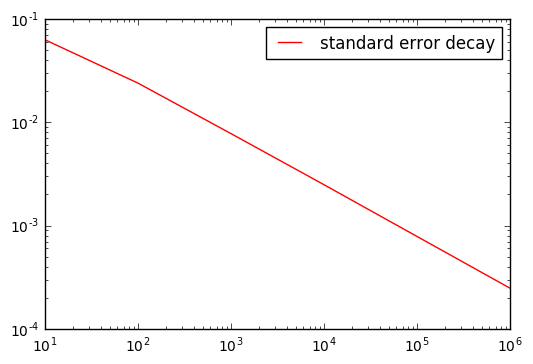

In [9]:
# Assignmnet 1
import numpy as np
from matplotlib.pyplot import *

if __name__ == '__main__':
    # declare function to integrate via Monte Carlo sampling
    func = lambda x: np.sin(x)

    # declare vector with number of samples
    N = [10, 100, 1000, 10000, 100000, 1000000]

    I_hat       = np.zeros(len(N))
    est_std_dev = np.zeros(len(N))

    # for each N, perform Monte Carlo integration
    for i, n in enumerate(N):
        # draw uniform samples in [0, 1]
        samples     = np.random.uniform(0, 1, n)
        # approximate the integral as the expectation of the underlying function w.r.t. the uniform distribution
        I_hat[i]    = np.mean(func(samples))
        # approximate the standard deviation of the estimatation
        est_std_dev[i] = np.sqrt(np.var((func(samples) - I_hat[i]), ddof=1))/np.sqrt(n)

    # plot results
    loglog(N, est_std_dev, 'r', label='standard error decay')
    legend(loc='best')
    show()

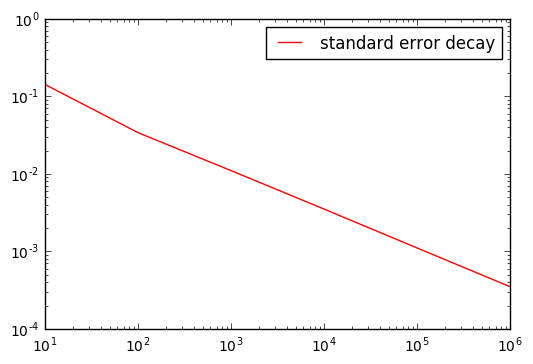

In [10]:
#Assignmnet 2
import numpy as np
from matplotlib.pyplot import *

if __name__ == '__main__':
    # declare function to integrate via Monte Carlo sampling
    func = lambda x: np.sin(x)

    # declare vector with number of samples
    N = [10, 100, 1000, 10000, 100000, 1000000]

    I_hat       = np.zeros(len(N))
    est_std_dev = np.zeros(len(N))

    # define new bounds
    a = 2
    b = 4

    # for each N, perform Monte Carlo integration
    for i, n in enumerate(N):
        # draw uniform samples in [a, b]
        samples     = np.random.uniform(0, 1, n)
        # approximate the integral as the expectation of the underlying function w.r.t. the uniform distribution
        # write the sample in [a, b] in terms of the generated sampled in [0, 1]
        I_hat[i]    = (b-a)*np.mean(func(a + (b-a)*samples))
        # approximate the standard deviation of the estimatation
        est_std_dev[i]  = np.sqrt((b-a)*np.var((func(samples) - I_hat[i]), ddof=1))/np.sqrt(n)

    # plot results
    loglog(N, est_std_dev, 'r', label='standard error decay')
    legend(loc='best')
    show()

In [12]:
# Assignmnet 3
import numpy as np
import chaospy as cp
from scipy.integrate import odeint

# to use the odeint function, we need to transform the second order differential equation
# into a system of two linear equations
def model(w, t, p):
	x1, x2 		= w
	c, k, f, w 	= p

	f = [x2, f*np.cos(w*t) - k*x1 - c*x2]

	return f

# discretize the oscillator using the odeint function
def discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest):
	sol = odeint(model, init_cond, t, args=(args,), atol=atol, rtol=rtol)

	return sol[t_interest, 0]

if __name__ == '__main__':
    # relative and absolute tolerances for the ode int solver
    atol = 1e-10
    rtol = 1e-10

    # parameters setup as specified in the assignement
    c   = 0.5
    k   = 2.0
    f   = 0.5
    w   = 1.0
    y0  = 0.5
    y1  = 0.

    # time domain setup
    t_max       = 20.
    dt          = 0.01
    grid_size   = int(t_max/dt) + 1
    t           = np.array([i*dt for i in range(grid_size)])
    t_interest  = len(t)/2 

    # initial conditions and parameters setup
    init_cond   = y0, y1 
    args        = c, k, f, w

    # perform deterministic computations
    sol_odeint = discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest)

    print ('y(10) = ', sol_odeint)

y(10) =  -0.452735796222


C:\Users\Marzieh\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [14]:
#Assignmnet 4
import numpy as np
import chaospy as cp
from scipy.integrate import odeint

# to use the odeint function, we need to transform the second order differential equation
# into a system of two linear equations
def model(w, t, p):
	x1, x2 		= w
	c, k, f, w 	= p

	f = [x2, f*np.cos(w*t) - k*x1 - c*x2]

	return f

# discretize the oscillator using the odeint function
def discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest):
	sol = odeint(model, init_cond, t, args=(args,), atol=atol, rtol=rtol)

	return sol[t_interest, 0]

if __name__ == '__main__':
    # relative and absolute tolerances for the ode int solver
    atol = 1e-10
    rtol = 1e-10

    # parameters setup as specified in the assignement
    c   = 0.5
    k   = 2.0
    f   = 0.5
    y0  = 0.5
    y1  = 0.

    # w is no longer deterministic
    # w_left  = 0.95
    # w_right = 1.05

    w_left  = 0.8
    w_right = 1.2

    # create uniform distribution object
    distr_w = cp.Uniform(w_left, w_right)

    # no of samples from Monte Carlo sampling
    no_samples_vec = [100, 1000, 10000]

    # time domain setup
    t_max       = 20.
    dt          = 0.01
    grid_size   = int(t_max/dt) + 1
    t           = np.array([i*dt for i in range(grid_size)])
    t_interest  = len(t)/2

    # initial conditions setup
    init_cond   = y0, y1

    # create vectors to contain the expectations and variances
    Exps = np.zeros(len(no_samples_vec))
    Vars = np.zeros(len(no_samples_vec))

    # perform Monte Carlo sampling
    for i, no_samples in enumerate(no_samples_vec):
        samples     = distr_w.sample(size=no_samples)
        sol_odeint  = np.zeros(no_samples)

        # Monte Carlo sampling; for each input sample, compute the underlying solution
        for j, w in enumerate(samples):
            args            = c, k, f, w
            sol_odeint[j]   = discretize_oscillator_odeint(model, atol, rtol, init_cond, args, t, t_interest)

        # compute statistics
        Exps[i] = np.mean(sol_odeint)
        Vars[i] = np.var(sol_odeint, ddof=1)

    # print results
    for i, no_samples in enumerate(no_samples_vec):
        print ('No samples = ', no_samples, ', E[y(10)] = ', Exps[i])
        print ('No samples = ', no_samples, ', Var[y(10)] = ', Vars[i])

C:\Users\Marzieh\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


No samples =  100 , E[y(10)] =  -0.276142665773
No samples =  100 , Var[y(10)] =  0.0233266993094
No samples =  1000 , E[y(10)] =  -0.256261201419
No samples =  1000 , Var[y(10)] =  0.0256447816582
No samples =  10000 , E[y(10)] =  -0.260888044681
No samples =  10000 , Var[y(10)] =  0.0261026669165
